In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
import skimage.color as color
import cv2

import skimage.filters as filters
import skimage.exposure as exposure

import scipy.ndimage as nd

In [5]:
original_img = imread('Images_in/sample.jpg')
original_img_gray = color.rgb2gray(original_img)
original_img_gray = exposure.rescale_intensity(original_img_gray,(0,1),(0,255))
original_img_red_channel = cv2.split(original_img)

(<matplotlib.axes._subplots.AxesSubplot at 0x1ecacc08e80>,
 <matplotlib.image.AxesImage at 0x1ecacc76c50>)

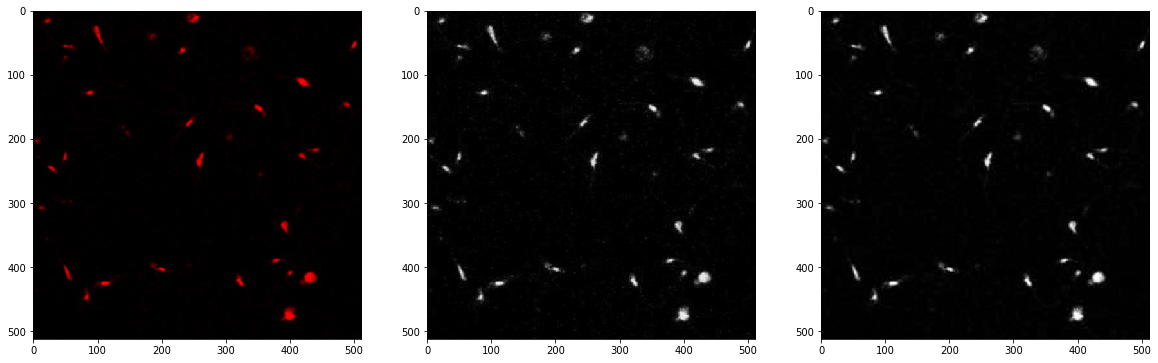

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(original_img)
plt.subplot(132),plt.imshow(original_img_gray,cmap='gray')
plt.subplot(133),plt.imshow(original_img_red_channel[0],cmap='gray')

In [47]:
def segmentation(image):
    image_bw = color.rgb2gray(image)
    image_filtered = nd.gaussian_filter(image_bw, sigma=3)
    image_threshold = filters.threshold_otsu(image_filtered)
    mask = (image_bw > image_threshold) * 255
    return mask.astype(np.uint8)

In [49]:
# mascara
mask = imread('mascara.png')/255
# imagen segmentada
segmented_img = segmentation(original_img)/255

(<matplotlib.axes._subplots.AxesSubplot at 0x1ecb079cf60>,
 <matplotlib.image.AxesImage at 0x1ecb0806940>)

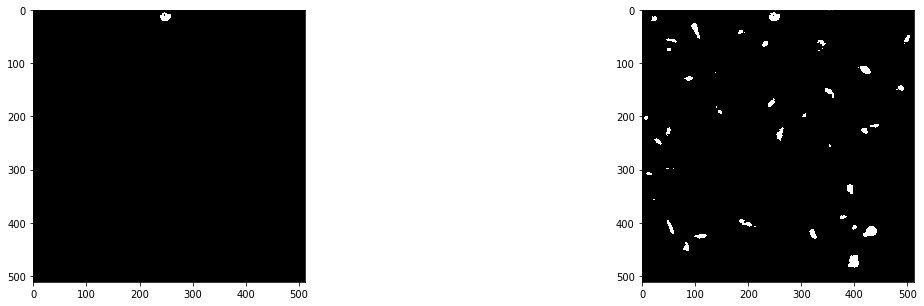

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(121),plt.imshow(mask,cmap='gray')
plt.subplot(122),plt.imshow(segmented_img,cmap='gray')

In [32]:
# consturccion de img "fluorescent mask"
fluorescent_mask = original_img_gray*mask

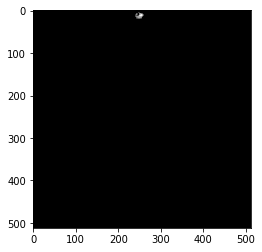

In [36]:
plt.imshow(fluorescent_mask,cmap='gray')